In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install opendatasets
!pip install pandas

In [4]:
import opendatasets as od
import pandas

od.download(
	"https://www.kaggle.com/datasets/kwentar/blur-dataset")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aakashrocks
Your Kaggle Key: ··········


100%|██████████| 1.49G/1.49G [01:19<00:00, 20.2MB/s]


In [33]:
import cv2
import os
from tqdm import tqdm

src_dir = '/content/blur-dataset/sharp'
images = os.listdir(src_dir)
dst_dir = '/content/drive/MyDrive/Blurred_Images'

for i, img in tqdm(enumerate(images), total=len(images)):
    img = cv2.imread(f"{src_dir}/{images[i]}")
    # add gaussian blurring
    blur = cv2.GaussianBlur(img, (51, 51), 0)
    cv2.imwrite(f"{dst_dir}/{images[i]}", blur)

print('DONE')

100%|██████████| 350/350 [01:27<00:00,  3.98it/s]

DONE


In [5]:
! git clone https://github.com/sovit-123/image-deblurring-using-deep-learning

Cloning into 'image-deblurring-using-deep-learning'...
remote: Enumerating objects: 269, done.
remote: Counting objects: 100% (269/269), done.
remote: Compressing objects: 100% (255/255), done.
remote: Total 269 (delta 19), reused 257 (delta 11), pack-reused 0
Receiving objects: 100% (269/269), 3.84 MiB | 1.05 MiB/s, done.
Resolving deltas: 100% (19/19), done.


In [ ]:
!wget -q https://raw.githubusercontent.com/sovit-123/image-deblurring-using-deep-learning/master/src/add_gaussian_blur.py

In [ ]:
!wget -q https://raw.githubusercontent.com/sovit-123/image-deblurring-using-deep-learning/master/src/add_gaussian_blur_test_image.py

In [ ]:
!wget -q https://raw.githubusercontent.com/sovit-123/image-deblurring-using-deep-learning/master/src/deblur_ae.py

In [ ]:
!wget -q https://raw.githubusercontent.com/sovit-123/image-deblurring-using-deep-learning/master/src/models.py

In [ ]:
!wget -q https://raw.githubusercontent.com/sovit-123/image-deblurring-using-deep-learning/master/src/test.py

In [36]:
import os
import cv2
import matplotlib.pyplot as plt

In [37]:
gauss_blur = os.listdir('/content/drive/MyDrive/Blurred_Images')
gauss_blur.sort()
sharp = os.listdir('/content/blur-dataset/sharp')
sharp.sort()

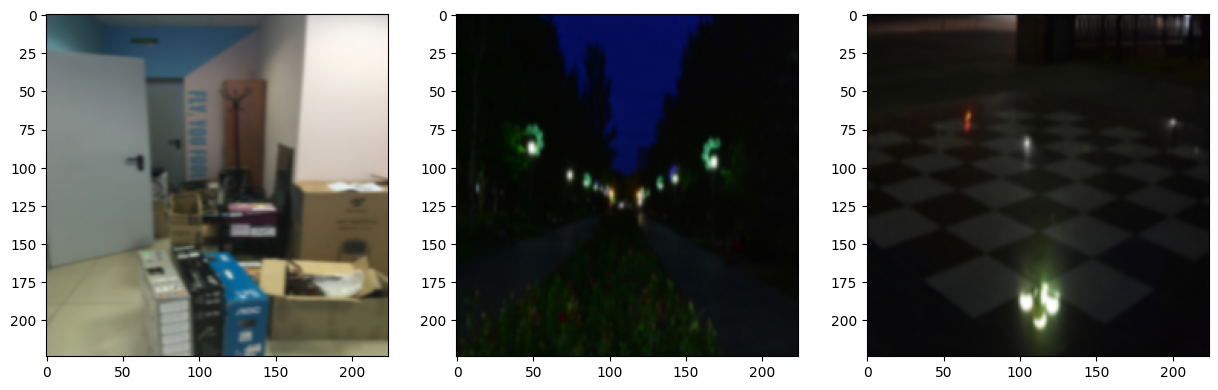

In [38]:
plt.figure(figsize=(15, 12))
for i in range(3):
    blur_image = plt.imread(f"/content/drive/MyDrive/Blurred_Images/{gauss_blur[i]}")
    blur_image = cv2.resize(blur_image, (224, 224))
    plt.subplot(1, 3, i+1)
    plt.imshow(blur_image)
plt.show()

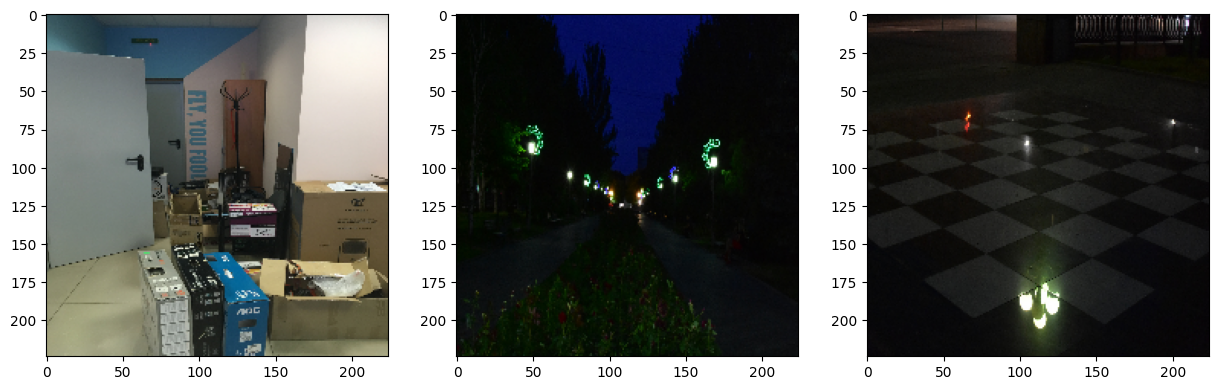

In [9]:
plt.figure(figsize=(15, 12))
for i in range(3):
    sharp_image = plt.imread(f"/content/blur-dataset/sharp/{sharp[i]}")
    sharp_image = cv2.resize(sharp_image, (224, 224))
    plt.subplot(1, 3, i+1)
    plt.imshow(sharp_image)
plt.show()

In [ ]:
import torch
import torch.nn as nn
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

In [ ]:
!pip install https://raw.githubusercontent.com/sovit-123/image-deblurring-using-deep-learning/master/src/deblur_ae.py

  ERROR: Cannot unpack file /tmp/pip-unpack-q1by1btz/deblur_ae.py (downloaded from /tmp/pip-req-build-mi9a8mj5, content-type: text/plain; charset=utf-8); cannot detect archive format
ERROR: Cannot determine archive format of /tmp/pip-req-build-mi9a8mj5


In [ ]:
# model = torch.load('/content/image-deblurring-using-deep-learning/src/add_gaussian_blur.py')

In [11]:
# import torch
# import torch.nn as nn

# # Encoder
# class Encoder(nn.Module):
#     def __init__(self, input_shape, latent_dim, layer_filters, kernel_size):
#         super(Encoder, self).__init__()

#         self.encoder = nn.Sequential(
#             nn.Conv2d(input_shape[0], layer_filters[0], kernel_size, stride=2, padding=1),
#             nn.ReLU(),
#             nn.Conv2d(layer_filters[0], layer_filters[1], kernel_size, stride=2, padding=1),
#             nn.ReLU(),
#             nn.Conv2d(layer_filters[1], layer_filters[2], kernel_size, stride=2, padding=1),
#             nn.ReLU()
#         )

#         self.flatten = nn.Flatten()
#         self.latent = nn.Linear(layer_filters[2] * (input_shape[1] // 8) * (input_shape[2] // 8), latent_dim)

#     def forward(self, x):
#         x = self.encoder(x)
#         x = self.flatten(x)
#         latent = self.latent(x)
#         return latent


# # Decoder
# class Decoder(nn.Module):
#     def __init__(self, latent_dim, output_shape, layer_filters, kernel_size):
#         super(Decoder, self).__init__()

#         self.decoder = nn.Sequential(
#             nn.Linear(latent_dim, layer_filters[2] * (output_shape[1] // 8) * (output_shape[2] // 8)),
#             nn.ReLU()
#         )

#         self.unflatten = nn.Unflatten(1, (layer_filters[2], output_shape[1] // 8, output_shape[2] // 8))

#         self.transposed_conv = nn.Sequential(
#             nn.ConvTranspose2d(layer_filters[2], layer_filters[1], kernel_size, stride=2, padding=1, output_padding=1),
#             nn.ReLU(),
#             nn.ConvTranspose2d(layer_filters[1], layer_filters[0], kernel_size, stride=2, padding=1, output_padding=1),
#             nn.ReLU(),
#             nn.ConvTranspose2d(layer_filters[0], output_shape[0], kernel_size, stride=2, padding=1, output_padding=1),
#             nn.Sigmoid()
#         )

#     def forward(self, x):
#         x = self.decoder(x)
#         x = self.unflatten(x)
#         output = self.transposed_conv(x)
#         return output


# # Autoencoder
# class Autoencoder(nn.Module):
#     def __init__(self, input_shape, latent_dim, layer_filters, kernel_size):
#         super(Autoencoder, self).__init__()

#         self.encoder = Encoder(input_shape, latent_dim, layer_filters, kernel_size)
#         self.decoder = Decoder(latent_dim, input_shape, layer_filters[::-1], kernel_size)

#     def forward(self, x):
#         latent = self.encoder(x)
#         output = self.decoder(latent)
#         return output



# input_shape = (3, 224, 224)
# latent_dim = 256
# layer_filters = [64, 128, 256]
# kernel_size = 3
# batch_size = 8

# # Create the autoencoder
# model = Autoencoder(input_shape, latent_dim, layer_filters, kernel_size)

# # # Generate a random input batch
# # input_batch = torch.randn(batch_size, *input_shape)

# # # Pass the input batch through the autoencoder
# # output_batch = autoencoder(input_batch)

# # # Print the shapes of input and output batches
# # print("Input batch shape:", input_batch.shape)
# # print("Output batch shape:", output_batch.shape)


In [65]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(3, 128, kernel_size=5, padding=1)
        self.conv2 = nn.Conv2d(128, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 3, kernel_size=1, padding=1)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))

        return x

class SimpleAE(nn.Module):
    def __init__(self):
        super(SimpleAE, self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=5),
            nn.ReLU(True),
            nn.Conv2d(32, 64, kernel_size=5),
            nn.ReLU(True))
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, kernel_size=5),
            nn.ReLU(True),
            nn.ConvTranspose2d(32, 3, kernel_size=5),
            nn.ReLU(True))
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [66]:
model = SimpleAE()

In [ ]:
# model = autoencoder()

TypeError: ignored

In [12]:
%%python

UsageError: %%python is a cell magic, but the cell body is empty.


Enter the number of epochs: 30
cuda:0
16_IPHONE-7_S.jpeg
16_IPHONE-7_S.jpeg
280
70
SimpleAE(
  (encoder): Sequential(
    (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
    (3): ReLU(inplace=True)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(64, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): ConvTranspose2d(32, 3, kernel_size=(5, 5), stride=(1, 1))
    (3): ReLU(inplace=True)
  )
)
Epoch 1 of 30


100%|██████████| 35/35 [00:44<00:00,  1.27s/it]


Train Loss: 0.03857, Train PSNR: 16.08


9it [00:11,  1.28s/it]


Val Loss: 0.01324, Val PSNR: 19.18
Epoch 2 of 30


100%|██████████| 35/35 [00:39<00:00,  1.12s/it]


Train Loss: 0.01013, Train PSNR: 20.55


9it [00:08,  1.02it/s]


Val Loss: 0.00670, Val PSNR: 22.13
Epoch 3 of 30


100%|██████████| 35/35 [00:40<00:00,  1.15s/it]


Train Loss: 0.00491, Train PSNR: 23.57


9it [00:09,  1.08s/it]


Val Loss: 0.00390, Val PSNR: 24.62
Epoch 4 of 30


100%|██████████| 35/35 [00:42<00:00,  1.21s/it]


Train Loss: 0.00425, Train PSNR: 24.42


9it [00:10,  1.15s/it]


Val Loss: 0.00481, Val PSNR: 23.57
Epoch 5 of 30


100%|██████████| 35/35 [00:40<00:00,  1.16s/it]


Train Loss: 0.00305, Train PSNR: 25.83


9it [00:08,  1.07it/s]


Val Loss: 0.00254, Val PSNR: 26.70
Epoch 6 of 30


100%|██████████| 35/35 [00:39<00:00,  1.14s/it]


Train Loss: 0.00239, Train PSNR: 26.92


9it [00:09,  1.08s/it]


Val Loss: 0.00214, Val PSNR: 27.57
Epoch 7 of 30


100%|██████████| 35/35 [00:39<00:00,  1.14s/it]


Train Loss: 0.00214, Train PSNR: 27.43


9it [00:08,  1.06it/s]


Val Loss: 0.00201, Val PSNR: 27.81
Epoch 8 of 30


100%|██████████| 35/35 [00:41<00:00,  1.18s/it]


Train Loss: 0.00211, Train PSNR: 27.46


9it [00:10,  1.15s/it]


Val Loss: 0.00198, Val PSNR: 27.77
Epoch 9 of 30


100%|██████████| 35/35 [00:39<00:00,  1.14s/it]


Train Loss: 0.00196, Train PSNR: 27.79


9it [00:09,  1.08s/it]


Val Loss: 0.00209, Val PSNR: 27.39
Epoch 10 of 30


100%|██████████| 35/35 [00:39<00:00,  1.13s/it]


Train Loss: 0.00175, Train PSNR: 28.33


9it [00:08,  1.05it/s]


Val Loss: 0.00194, Val PSNR: 27.75
Epoch 11 of 30


100%|██████████| 35/35 [00:39<00:00,  1.12s/it]


Train Loss: 0.00169, Train PSNR: 28.51


9it [00:09,  1.07s/it]


Val Loss: 0.00159, Val PSNR: 28.81
Epoch 12 of 30


100%|██████████| 35/35 [00:39<00:00,  1.12s/it]


Train Loss: 0.00169, Train PSNR: 28.42


9it [00:08,  1.02it/s]


Val Loss: 0.00152, Val PSNR: 29.02
Epoch 13 of 30


100%|██████████| 35/35 [00:39<00:00,  1.14s/it]


Train Loss: 0.00148, Train PSNR: 29.08


9it [00:09,  1.08s/it]


Val Loss: 0.00153, Val PSNR: 28.95
Epoch 14 of 30


100%|██████████| 35/35 [00:39<00:00,  1.13s/it]


Train Loss: 0.00142, Train PSNR: 29.26


9it [00:08,  1.09it/s]


Val Loss: 0.00156, Val PSNR: 28.75
Epoch 15 of 30


100%|██████████| 35/35 [00:39<00:00,  1.12s/it]


Train Loss: 0.00148, Train PSNR: 29.08


9it [00:09,  1.08s/it]


Val Loss: 0.00181, Val PSNR: 27.96
Epoch 16 of 30


100%|██████████| 35/35 [00:39<00:00,  1.13s/it]


Train Loss: 0.00157, Train PSNR: 28.69


9it [00:08,  1.06it/s]


Val Loss: 0.00169, Val PSNR: 28.25
Epoch 17 of 30


100%|██████████| 35/35 [00:40<00:00,  1.16s/it]


Train Loss: 0.00133, Train PSNR: 29.57


9it [00:09,  1.08s/it]


Val Loss: 0.00155, Val PSNR: 28.68
Epoch 18 of 30


100%|██████████| 35/35 [00:38<00:00,  1.11s/it]


Train Loss: 0.00126, Train PSNR: 29.79


9it [00:08,  1.08it/s]


Val Loss: 0.00116, Val PSNR: 30.35
Epoch 19 of 30


100%|██████████| 35/35 [00:39<00:00,  1.13s/it]


Train Loss: 0.00121, Train PSNR: 29.98


9it [00:09,  1.07s/it]


Val Loss: 0.00122, Val PSNR: 29.96
Epoch 20 of 30


100%|██████████| 35/35 [00:39<00:00,  1.12s/it]


Train Loss: 0.00137, Train PSNR: 29.36


9it [00:08,  1.03it/s]


Val Loss: 0.00132, Val PSNR: 29.51
Epoch 21 of 30


100%|██████████| 35/35 [00:40<00:00,  1.15s/it]


Train Loss: 0.00136, Train PSNR: 29.53


9it [00:09,  1.07s/it]


Val Loss: 0.00179, Val PSNR: 27.89
Epoch 22 of 30


100%|██████████| 35/35 [00:39<00:00,  1.13s/it]


Train Loss: 0.00141, Train PSNR: 29.26


9it [00:09,  1.07s/it]


Val Loss: 0.00113, Val PSNR: 30.39
Epoch 23 of 30


100%|██████████| 35/35 [00:38<00:00,  1.09s/it]


Train Loss: 0.00108, Train PSNR: 30.56


9it [00:09,  1.05s/it]


Val Loss: 0.00100, Val PSNR: 31.04
Epoch 24 of 30


100%|██████████| 35/35 [00:39<00:00,  1.12s/it]


Train Loss: 0.00116, Train PSNR: 30.15


9it [00:09,  1.08s/it]


Val Loss: 0.00115, Val PSNR: 30.22
Epoch 25 of 30


100%|██████████| 35/35 [00:39<00:00,  1.12s/it]


Train Loss: 0.00130, Train PSNR: 29.68


9it [00:09,  1.10s/it]


Val Loss: 0.00185, Val PSNR: 27.75
Epoch 26 of 30


100%|██████████| 35/35 [00:39<00:00,  1.12s/it]


Train Loss: 0.00135, Train PSNR: 29.53


9it [00:09,  1.07s/it]


Val Loss: 0.00101, Val PSNR: 30.98
Epoch 27 of 30


100%|██████████| 35/35 [00:38<00:00,  1.10s/it]


Train Loss: 0.00100, Train PSNR: 30.93


9it [00:08,  1.01it/s]


Val Loss: 0.00095, Val PSNR: 31.26
Epoch 28 of 30


100%|██████████| 35/35 [00:39<00:00,  1.12s/it]


Train Loss: 0.00093, Train PSNR: 31.25


9it [00:09,  1.08s/it]


Val Loss: 0.00091, Val PSNR: 31.48
Epoch 29 of 30


100%|██████████| 35/35 [00:39<00:00,  1.12s/it]


Train Loss: 0.00107, Train PSNR: 30.49


9it [00:08,  1.03it/s]


Val Loss: 0.00101, Val PSNR: 30.84
Epoch 30 of 30


100%|██████████| 35/35 [00:40<00:00,  1.15s/it]


Train Loss: 0.00101, Train PSNR: 30.83


9it [00:09,  1.08s/it]


Val Loss: 0.00094, Val PSNR: 31.26
Took -24.610 minutes to train


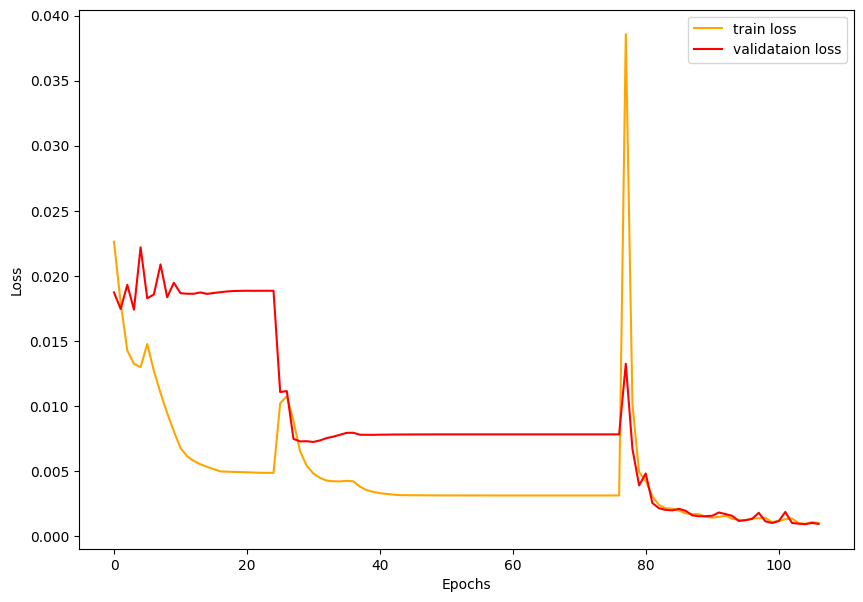

Saving model...


In [68]:
# %%python
import numpy as np
import os
import matplotlib.pyplot as plt
import glob
import cv2
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
import albumentations
import argparse
# import models

from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import transforms
from torchvision.utils import save_image
from sklearn.model_selection import train_test_split
from PIL import Image



# constructing the argument parser
# parser = argparse.ArgumentParser()
# parser.add_argument('-e', '--epochs', type=int, default=50,
#             help='number of epochs to train the model for')
args = {}
args['epochs'] = int(input('Enter the number of epochs: '))

# helper functions
image_dir = '/content/output_images'
os.makedirs(image_dir, exist_ok=True)

def save_decoded_image(img, name):
    img = img.view(img.size(0), 3, 224, 224)
    save_image(img, name)

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

print(device)

batch_size = 8

gauss_blur = os.listdir('/content/drive/MyDrive/Blurred_Images')
gauss_blur.sort()
sharp = os.listdir('/content/blur-dataset/sharp')
sharp.sort()

x_blur = []
for i in range(len(gauss_blur)):
    x_blur.append(gauss_blur[i])

y_sharp = []
for i in range(len(sharp)):
    y_sharp.append(sharp[i])

print(x_blur[10])
print(y_sharp[10])

(x_train, x_val, y_train, y_val) = train_test_split(x_blur, y_sharp, test_size=0.2)

print(len(x_train))
print(len(x_val))

# define transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])



class DeblurDataset(Dataset): #Returns Tensors
    def __init__(self, blur_paths, sharp_paths=None, transforms=None):
        self.X = blur_paths
        self.y = sharp_paths
        self.transforms = transforms

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        blur_image = Image.open(f"/content/drive/MyDrive/Blurred_Images/{self.X[i]}")

        if self.transforms:
            blur_image = self.transforms(blur_image)

        if self.y is not None:
            sharp_image = Image.open(f"/content/blur-dataset/sharp/{self.y[i]}")
            sharp_image = self.transforms(sharp_image)
            return blur_image, sharp_image
        else:
            return blur_image


train_data = DeblurDataset(x_train, y_train, transform)
val_data = DeblurDataset(x_val, y_val, transform)

trainloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
valloader = DataLoader(val_data, batch_size=batch_size, shuffle=False)

# Define your model or import it
# model = ...

model = model.to(device)
print(model)

# the metric for evaluation
def psnr(img1, img2):
    mse = torch.mean((img1 - img2) ** 2, dim=(1, 2, 3))
    psnr = 10 * torch.log10(1 / mse)
    return torch.mean(psnr)



criterion = nn.MSELoss()
# the optimizer
optimizer = optim.Adam([
    {'params': model.encoder.parameters(), 'lr': 0.001},
    {'params': model.decoder.parameters(), 'lr': 0.001}
])

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer,
        mode='min',
        patience=5,
        factor=0.1,
        verbose=True
    )



def fit(model, dataloader, epoch):
    model.train()
    running_loss = 0.0
    running_psnr = 0.0
    for i, data in tqdm(enumerate(dataloader), total=int(len(train_data)/dataloader.batch_size)):
        blur_image = data[0]
        sharp_image = data[1]
        blur_image = blur_image.to(device)
        sharp_image = sharp_image.to(device)
        optimizer.zero_grad()
        outputs = model(blur_image)
        outputs = F.interpolate(outputs, size=(224, 224), mode='bilinear')
        loss = criterion(outputs, sharp_image)
        psnr_value = psnr(outputs, sharp_image)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * blur_image.size(0)
        running_psnr += psnr_value.item() * blur_image.size(0)
    train_loss = running_loss / len(train_data)
    train_psnr = running_psnr / len(train_data)
    print(f"Train Loss: {train_loss:.5f}, Train PSNR: {train_psnr:.2f}")

    return train_loss

# the training function
def validate(model, dataloader, epoch):
    model.eval()
    running_loss = 0.0
    running_psnr = 0.0
    with torch.no_grad():
        for i, data in tqdm(enumerate(dataloader), total=int(len(val_data)/dataloader.batch_size)):
            blur_image = data[0]
            sharp_image = data[1]
            blur_image = blur_image.to(device)
            sharp_image = sharp_image.to(device)
            outputs = model(blur_image)
            loss = criterion(outputs, sharp_image)
            psnr_value = psnr(outputs, sharp_image)
            running_loss += loss.item() * blur_image.size(0)
            running_psnr += psnr_value.item() * blur_image.size(0)

        val_loss = running_loss / len(val_data)
        val_psnr = running_psnr / len(val_data)
        print(f"Val Loss: {val_loss:.5f}, Val PSNR: {val_psnr:.2f}")
        return val_loss

        save_decoded_image(outputs.cpu().data, name=f"/content/drive/MyDrive/Decoded images/{epoch}.jpg")

        return val_loss, val_psnr

train_loss  = []
val_loss = []
start = time.time()
for epoch in range(args['epochs']):
    print(f"Epoch {epoch+1} of {args['epochs']}")
    train_epoch_loss = fit(model, trainloader, epoch)
    val_epoch_loss = validate(model, valloader, epoch)
    train_loss.append(train_epoch_loss)
    val_loss.append(val_epoch_loss)
    scheduler.step(val_epoch_loss)
end = time.time()

print(f"Took {((start-end)/60):.3f} minutes to train")

# loss plots
plt.figure(figsize=(10, 7))
plt.plot(train_loss, color='orange', label='train loss')
plt.plot(val_loss, color='red', label='validataion loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# plt.savefig('../outputs/loss.png')
plt.show()

# save the model to disk
print('Saving model...')
torch.save(model.state_dict(), '/content/drive/MyDrive/SimpleAE.pt')

In [ ]:
5# print('Saving model...')
# torch.save(model.state_dict(), '/content/drive/MyDrive/Autoencoder Weights.pt')

In [ ]:
model = SimpleAE()

In [69]:
import numpy as np
import os
import matplotlib.pyplot as plt
import glob
import cv2
# import models
import torch

from torchvision.transforms import transforms
from torchvision.utils import save_image

def save_decoded_image(img, name):
    img = img.view(img.size(0), 3, 224, 224)
    save_image(img, name)

device = torch.device('cuda')

# # load the trained model
# model = model.to(device).eval()
# Create an instance of the enhanced autoencoder
model = SimpleAE()
model.load_state_dict(torch.load('/content/drive/MyDrive/SimpleAE.pt'))
model = model.to(device)
model.eval()
# model = model.to(device)

# ...

# define transforms
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# name = 'image_1'

image = cv2.imread(f"/content/image-deblurring-using-deep-learning/test_data/gaussian_blurred/image_1.jpg")
orig_image = image.copy()
orig_image = cv2.resize(orig_image, (224, 224))
cv2.imwrite(f"/content/image-deblurring-using-deep-learning/outputs/test_deblurred_images/original_blurred_image.jpg", orig_image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = transform(image).unsqueeze(0)
print(image.shape)

with torch.no_grad():
    outputs = model(image.to(device))  # Move the input tensor to the GPU
    save_decoded_image(outputs.cpu().data, name="output_AE.jpg")


torch.Size([1, 3, 224, 224])


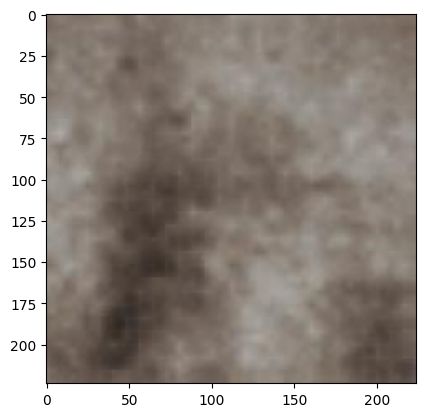

In [57]:
#
# %matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread("/content/output_5.jpg")
imgplot = plt.imshow(img)
plt.show()

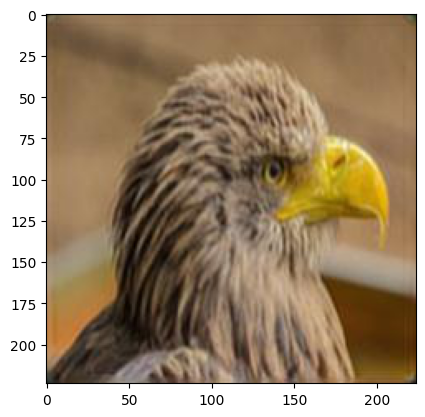

In [70]:
#
# %matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread("/content/output_AE.jpg")
imgplot = plt.imshow(img)
plt.show()

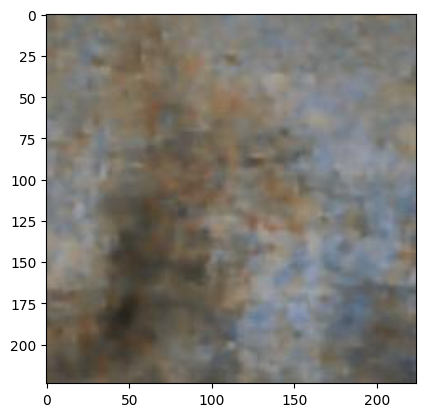

In [64]:
 #
# %matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread("/content/output_7.jpg")
imgplot = plt.imshow(img)
plt.show()